In [938]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [939]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [940]:
df=pd.read_csv('loan.csv')

In [941]:
df.shape

(39717, 111)

# 1. DATA CLEANING

## 1.1 Row cleaning

**Delete summary rows: Total, Subtotal rows**<br/>
**Delete incorrect rows: Header rows, Footer rows**

In [945]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [946]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<span style="color:blue">From the head and tail commands we can observe that there are no total, sub_total, header and footer rows</span>


**Delete extra rows**

In [949]:
print('Shape of rows:',df.shape)

Shape of rows: (39717, 111)


In [950]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [951]:
#From problem statement we understand that Current loan_status customers are not required
df=df[df['loan_status']!='Current']

In [952]:
# Shape of the DataFrame after removing Current loan_status customers
print('Shape of rows after removing Current loan_status customers:',df.shape)

Shape of rows after removing Current loan_status customers: (38577, 111)


In [953]:
# check duplicated rows
dup_len=len(df[df.duplicated()])
print('Length of duplicated rows', dup_len)

Length of duplicated rows 0


## 1.2 Column cleaning

In [955]:
# check percentage of null values in columns
(df.isna().sum()/len(df))*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.185033
emp_length                          2.677761
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.477901
purpose                             0.000000
title                               0.028514
zip_code  

<span style="color:blue">We observed that there are lot of columns having 100% null values</span>

In [957]:
# droping 100% null columns using dropna
df.dropna(axis=1, how='all', inplace=True)

In [958]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [959]:
print('Shape of the dataframe after droping 100% na columns:', df.shape)

Shape of the dataframe after droping 100% na columns: (38577, 56)


<span style="color:blue">We observed that 55 columns are dropped</span>

In [961]:
# Delete the rows having all the columns as null values
df.dropna(axis=0, how='all', inplace=True)

In [962]:
print('Shape of the dataframe after droping the rows having all null values:', df.shape)

Shape of the dataframe after droping the rows having all null values: (38577, 56)


<span style="color:blue">We observed that no null rows</span>

In [964]:
# Identify columns with unique values across rows
unique_columns = [col for col in df.columns if df[col].is_unique]
print(unique_columns)

['id', 'member_id', 'url']


In [965]:
#Drop member_id and url columns,id column might be useful
df.drop(columns=['url', 'member_id'], inplace=True)

In [966]:
print('Shape of the dataframe after droping the member_id and url columns:', df.shape)

Shape of the dataframe after droping the member_id and url columns: (38577, 54)


In [967]:
# Drop descriptive columns like title, emp_title and desc as they won't involve in analysis
df.drop(columns=['title', 'desc', 'emp_title'], inplace=True)

In [968]:
print('Shape of the dataframe after droping the title and desc columns:', df.shape)

Shape of the dataframe after droping the title and desc columns: (38577, 51)


In [969]:
#There are some fields which are not required during loan approval provess, so dropping them
drop_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']
df.drop(columns=drop_cols, axis=1, inplace=True)

In [970]:
print('Shape of the dataframe after droping the above drop_cols:', df.shape)

Shape of the dataframe after droping the above drop_cols: (38577, 30)


In [971]:
# count the distint elements in each column, columns which contain single distinct value may not be useful in analysis
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv             

In [972]:
unique_1_columns = df.nunique().sort_values()
constant_columns = unique_1_columns[unique_1_columns == 1].index.tolist()

In [973]:
print("Constant columns:",constant_columns)

Constant columns: ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan']


In [974]:
df.drop(columns=constant_columns, axis=1, inplace=True)

In [975]:
print('Shape of the dataframe after droping the constant columns:', df.shape)

Shape of the dataframe after droping the constant columns: (38577, 22)


In [976]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0


In [977]:
# Identify the columns which are having more than 50% null values
df.isna().mean()*100

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
mths_since_last_delinq    64.559193
mths_since_last_record    92.897322
pub_rec_bankruptcies       1.806776
dtype: float64

In [978]:
# mths_since_last_delinq and mths_since_last_record have more than 50% null values
df.drop(columns=['mths_since_last_delinq', 'mths_since_last_record'], inplace=True)
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [979]:
print('Shape of the dataframe after droping the mths_since_last_delinq & mths_since_last_record ', df.shape)

Shape of the dataframe after droping the mths_since_last_delinq & mths_since_last_record  (38577, 20)


# 2. DATA CONVERSION

In [981]:
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

### 2.1 Examine the term column

In [983]:
df['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [984]:
# add new column term_months with int dtype and drop term column
df['term_months']=df['term'].apply(lambda x: int(x.rstrip(' months')))
df.drop(columns=['term'], inplace=True)
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_months
0,1077501,5000,5000,4975.0,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0,36
1,1077430,2500,2500,2500.0,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0,60
2,1077175,2400,2400,2400.0,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0,36
3,1076863,10000,10000,10000.0,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0,36
5,1075269,5000,5000,5000.0,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0,36


In [985]:
print('New column term_months dtype:', df['term_months'].dtype)

New column term_months dtype: int64


### 2.2 Examine the int_rate column

In [987]:
df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
11.11%    331
12.53%    327
10.74%    311
6.54%     305
6.91%     303
8.94%     294
16.77%    294
7.66%     292
13.61%    291
13.98%    284
13.23%    263
11.12%    259
15.99%    259
6.17%     252
12.68%    251
10.75%    250
10.36%    250
10.00%    249
11.36%    247
13.99%    241
11.83%    233
10.62%    228
10.38%    219
13.06%    219
10.25%    218
16.49%    218
14.96%    214
15.65%    208
18.25%    207
11.14%    206
6.92%     204
12.18%    203
15.23%    200
15.95%    199
14.65%    198
16.32%    198
8.00%     191
15.21%    187
12.73%    187
9.62%     186
15.27%    1

In [988]:
# convert to float type by removing % at the end
df['int_rate']=df['int_rate'].apply(lambda x: float(x.rstrip('%')))
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_months
0,1077501,5000,5000,4975.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0,36
1,1077430,2500,2500,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0,60
2,1077175,2400,2400,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0,36
3,1076863,10000,10000,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0,36
5,1075269,5000,5000,5000.0,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0,36


In [989]:
print('New column int_rate dtype:', df['int_rate'].dtype)

New column int_rate dtype: float64


### 2.3 Examine the Grade column

In [991]:
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

### 2.4 Examine the Sub_Grade column

In [993]:
df['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

### 2.5 Examine the emp_length column

In [995]:
df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [996]:
# convert to int dtype, it may be useful in further analysis
df['emp_length']=df['emp_length'].str.extract('(\d+)')

### 2.6 Examine the home_ownership column

In [998]:
df['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

## 2.7 Examine the issue_d column

In [1000]:
# Convert to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')


In [1001]:
# Derive the month and year from issue_d which might be useful in further analysis
df['issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['issue_month']=pd.DatetimeIndex(df['issue_d']).month

In [1002]:
print('Shape of dataframe after adding two new columns issue_year and issue_month:', df.shape)

Shape of dataframe after adding two new columns issue_year and issue_month: (38577, 22)


In [1003]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_months,issue_year,issue_month
0,1077501,5000,5000,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,36,2011,12
1,1077430,2500,2500,2500.0,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,60,2011,12
2,1077175,2400,2400,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,36,2011,12
3,1076863,10000,10000,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,36,2011,12
5,1075269,5000,5000,5000.0,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,36,2011,12


## 2.8 Convert the int to float datatype and round off to 2 digits

In [1005]:
# convert to float
df['loan_amnt'] = df['loan_amnt'].astype(float)
df['funded_amnt'] = df['funded_amnt'].astype(float)

In [1006]:
# round off to 2 digits
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']] = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']].round(2)

In [1007]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_months,issue_year,issue_month
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,36,2011,12
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,60,2011,12
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,36,2011,12
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,36,2011,12
5,1075269,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,36,2011,12


# 3. DATA IMPUTATION

In [1009]:
df.isna().mean()*100

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
term_months             0.000000
issue_year              0.000000
issue_month             0.000000
dtype: float64

<span style="color:blue">We observed that the emp_length and pub_rec_bankruptcies have null values <br> As the values are very less we can drop them or we can assign some value</span>

In [1011]:
# Dropping the values as they are less
df=df[df['emp_length'].notna()]
df=df[df['pub_rec_bankruptcies'].notna()]

In [1012]:
print('Shape of the dataframe after droping the na rows', df.shape)

Shape of the dataframe after droping the na rows (36847, 22)


In [1013]:
df.isna().mean()*100

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
term_months             0.0
issue_year              0.0
issue_month             0.0
dtype: float64

<span style="color:blue">Now we have the data with no null values</span>

<span style="color:orange">Note that we have added three columns issue_year, issue_month and term_months</span>

<span style="color:green">Now we are ready for the analysis</span>


In [1017]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_months,issue_year,issue_month
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,36,2011,12
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,60,2011,12
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,36,2011,12
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,36,2011,12
5,1075269,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,36,2011,12


# 4. UNIVARIATE ANALYSIS

## 4.1 Quantative Variables

**Examine the quantative/numerical variables with box plots to understand any outliers present in it**

### LOAN AMOUNT

In [1022]:
df['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

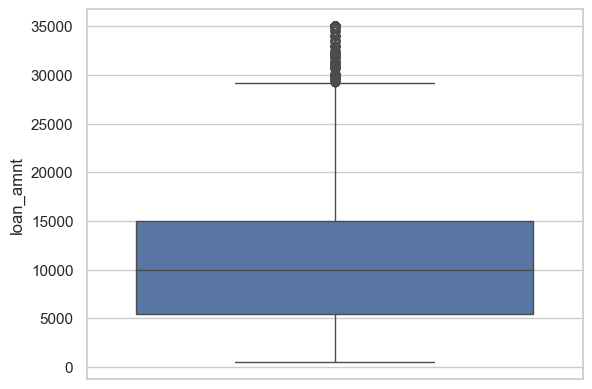

In [1023]:
sns.boxplot(data=df, y='loan_amnt')
plt.show()

### FUNDED AMOUNT

In [1025]:
df['funded_amnt'].describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

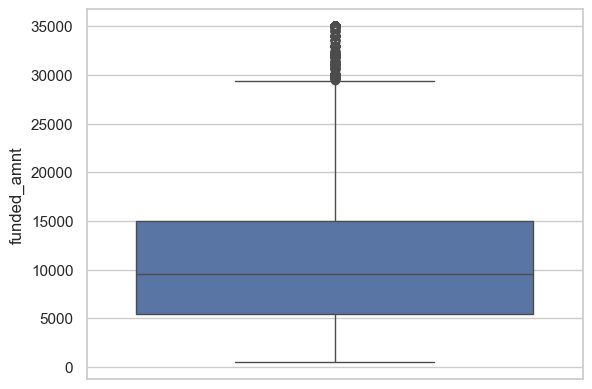

In [1026]:
sns.boxplot(data=df, y='funded_amnt')
plt.show()

### FUNDED AMOUNT INV

In [1028]:
df['funded_amnt_inv'].describe()

count    36847.000000
mean     10430.400868
std       7008.919434
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

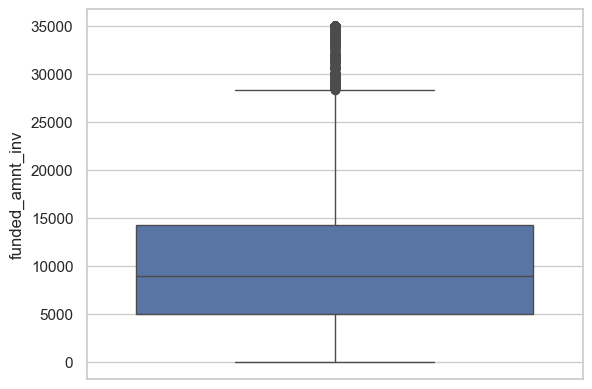

In [1029]:
sns.boxplot(data=df, y='funded_amnt_inv')
plt.show()

### INTREST RATE

In [1031]:
df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

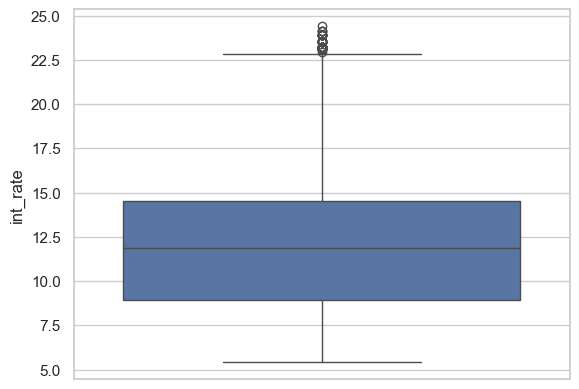

In [1032]:
sns.boxplot(data=df, y='int_rate')
plt.show()

### INSTALLMENT

In [1034]:
df['installment'].describe()

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64

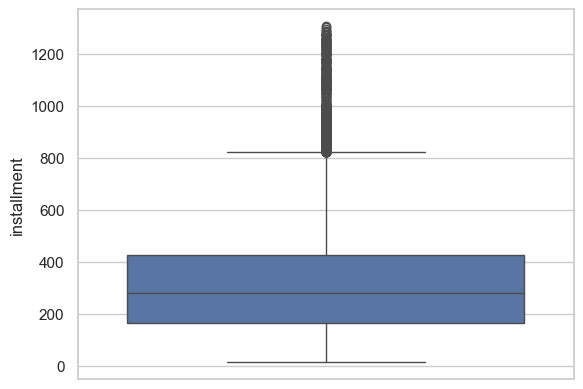

In [1035]:
sns.boxplot(data=df, y='installment')
plt.show()

### ANNUAL INCOME

In [1037]:
df['annual_inc'].describe()

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

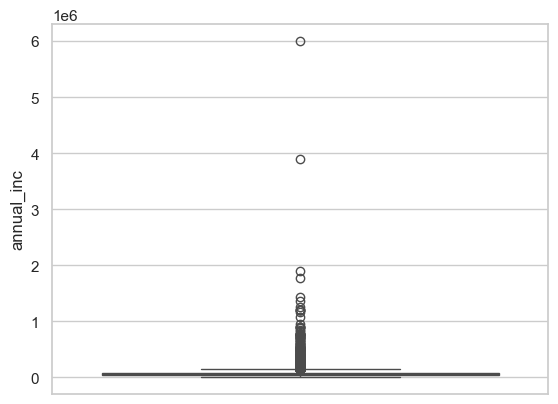

In [1038]:
sns.boxplot(data=df, y='annual_inc')
plt.show()

### DTI

In [1040]:
df['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

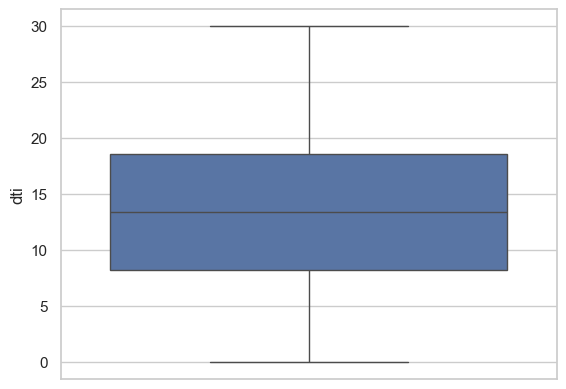

In [1041]:
sns.boxplot(data=df, y='dti')
plt.show()

<span style="color:green">OBSERVATION: From the box plots we observed that there are outliers present in </br> 1. loan_amnt </br>2. funded_amnt </br> 3. funded_amnt_inv </br> 4. int_rate </br> 5. installment </br> 6. annual_inc  </span>

In [1043]:
# function to remove outliers by iqr method
def remove_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df_no_outliers
    

In [1044]:
# Removing outliers by calling remove_outliers_iqr definition which we declared above
df=remove_outliers_iqr('loan_amnt')
df=remove_outliers_iqr('funded_amnt')
df=remove_outliers_iqr('funded_amnt_inv')
df=remove_outliers_iqr('int_rate')
df=remove_outliers_iqr('installment')
df=remove_outliers_iqr('annual_inc')

In [1045]:
print('Shape of the dataframe after removing the outliers', df.shape)

Shape of the dataframe after removing the outliers (33191, 22)


**Box plots of outlier columns after removing the outliers**

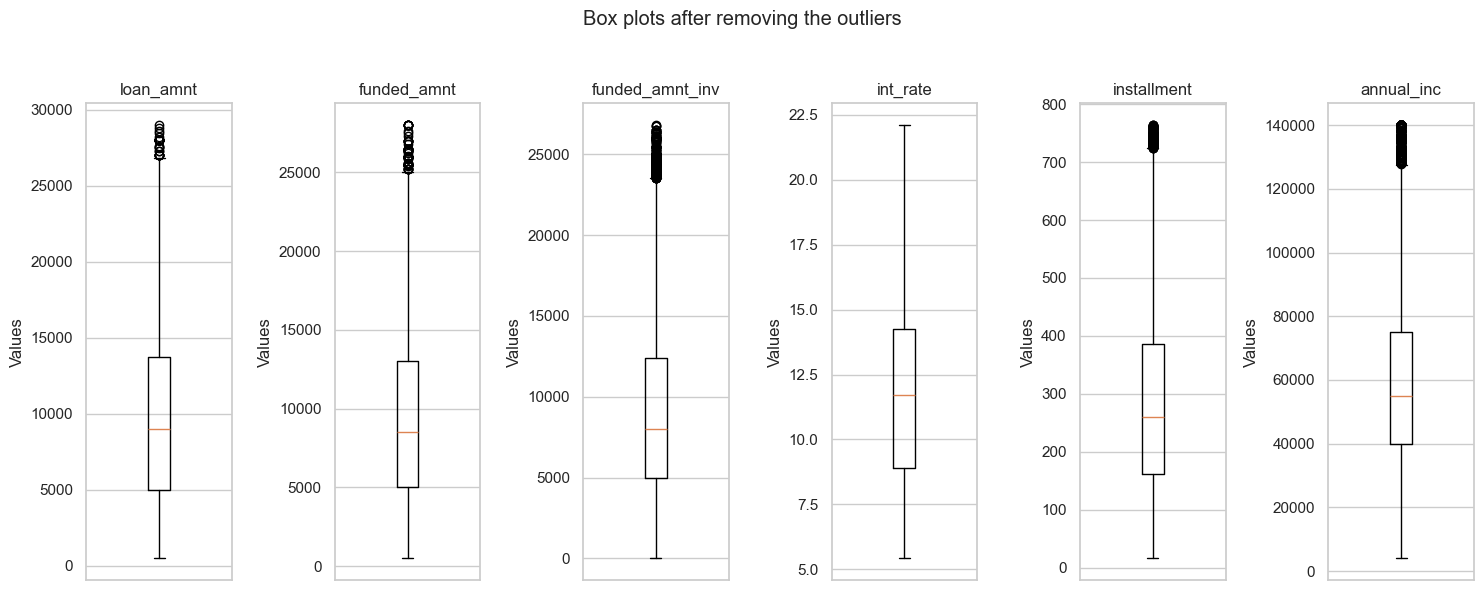

In [1047]:
columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc']

# Plotting side by side
plt.figure(figsize=(15, 6))
plt.suptitle("Box plots after removing the outliers")

for i, col in enumerate(columns):
    plt.subplot(1, 6, i + 1)  # 1 row, 6 columns
    plt.boxplot(df[col])
    plt.title(col)
    plt.xticks([])  # Hide x-ticks for cleaner look
    plt.ylabel('Values')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [1048]:
# function to print histplot and boxplot side by with describe() metrics
def plot_distribution_boxplot(col):
    print(f"Descriptive Statistics for '{col}':\n")
    print(df[col].describe())
    print("\n" + "-"*50 + "\n")

    # Create subplots for side by side plots
    plt.figure(figsize=(12, 5))
    
    # Distribution plot (Histogram with KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


## LOAN AMOUNT

Descriptive Statistics for 'loan_amnt':

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

--------------------------------------------------



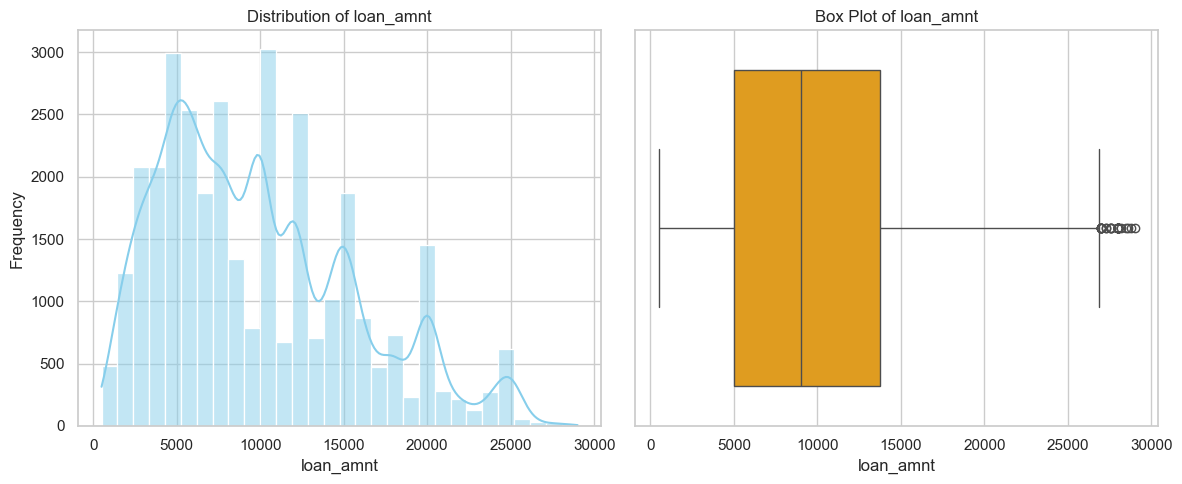

In [1050]:
plot_distribution_boxplot('loan_amnt')

<span style="color:green">OBSERVATION: </br> 
1. Most loans are applied between 5k & 14k </br>
2. Very less people are taking high loan amounts, greater than 20k  </br>
3. Max loan is around 30k
4. Average loan amount is 9820.83
</span>


## ANNUAL INCOME

Descriptive Statistics for 'annual_inc':

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

--------------------------------------------------



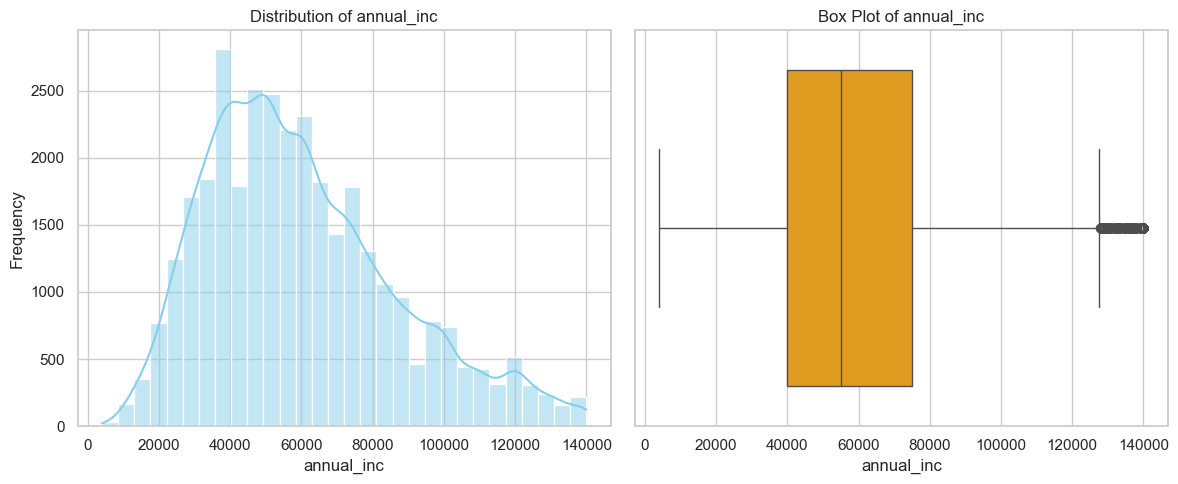

In [1053]:
plot_distribution_boxplot('annual_inc')

<span style="color:green">OBSERVATION: </br> 
1. Most of the annual incomes fall between 40k and 75k </br>
2. Very less people are having 80k+ salary  </br>
3. Max Salary is around 140k
4. Average annual income is 59883.3
</span>

## INTREST RATE

Descriptive Statistics for 'int_rate':

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

--------------------------------------------------



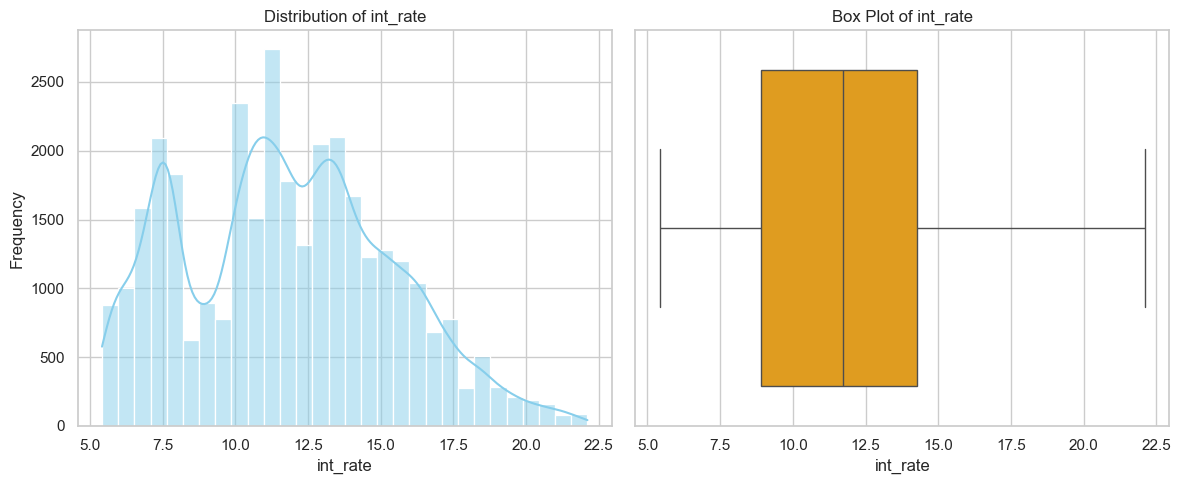

In [1056]:
plot_distribution_boxplot('int_rate')

<span style="color:green">OBSERVATION: </br> 
1. Most of the intrest rates fall between 8 and 14 </br>
2. Very less people are having 14+ intrest rate </br>
3. Max intrest rate is around 22
4. Average interest rate is 11.8
</span>

## 4.2 Unordered Categorical Variable

### 4.2.1 HOME OWNER SHIP

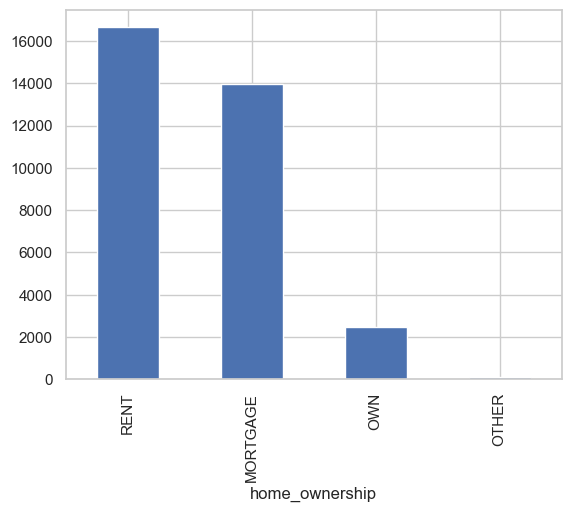

In [1060]:
df['home_ownership'].value_counts().plot.bar()
plt.show()

<span style="color:green">OBSERVATION: </br> 
1. Most of the loan applicants are in Rented or Mortage
2. Own house people are very less
</span>

### 4.2.2 PURPOSE

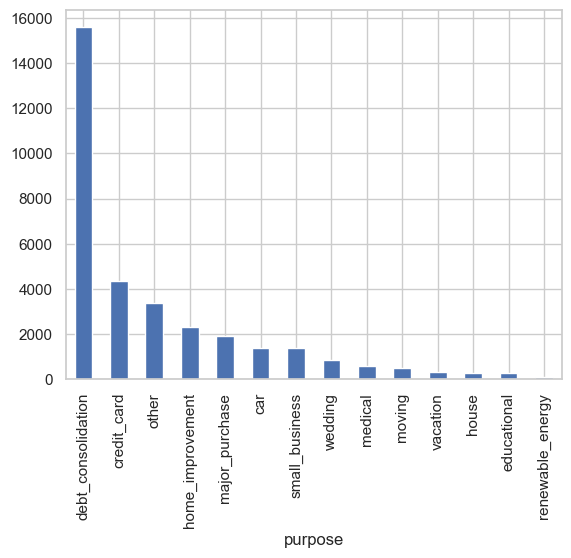

In [1063]:
df['purpose'].value_counts().plot.bar()
plt.show()

<span style="color:green">OBSERVATION: </br> 
1. Most of the loan applicants are applying for the purpose of debt consolidation
2. Other purposes are very low compared to debt consolidation
</span>

### 4.2.3 LOAN STATUS

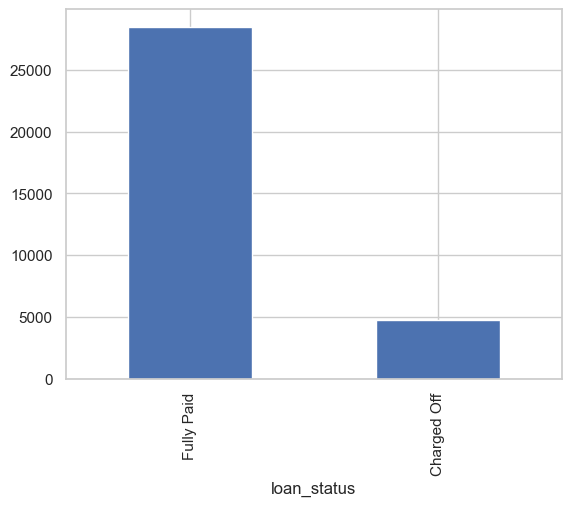

In [1066]:
df['loan_status'].value_counts().plot.bar()
plt.show()

<span style="color:green">OBSERVATION: </br> 
1. Most of the people are geniune
</span>

### 4.2.4 STATE

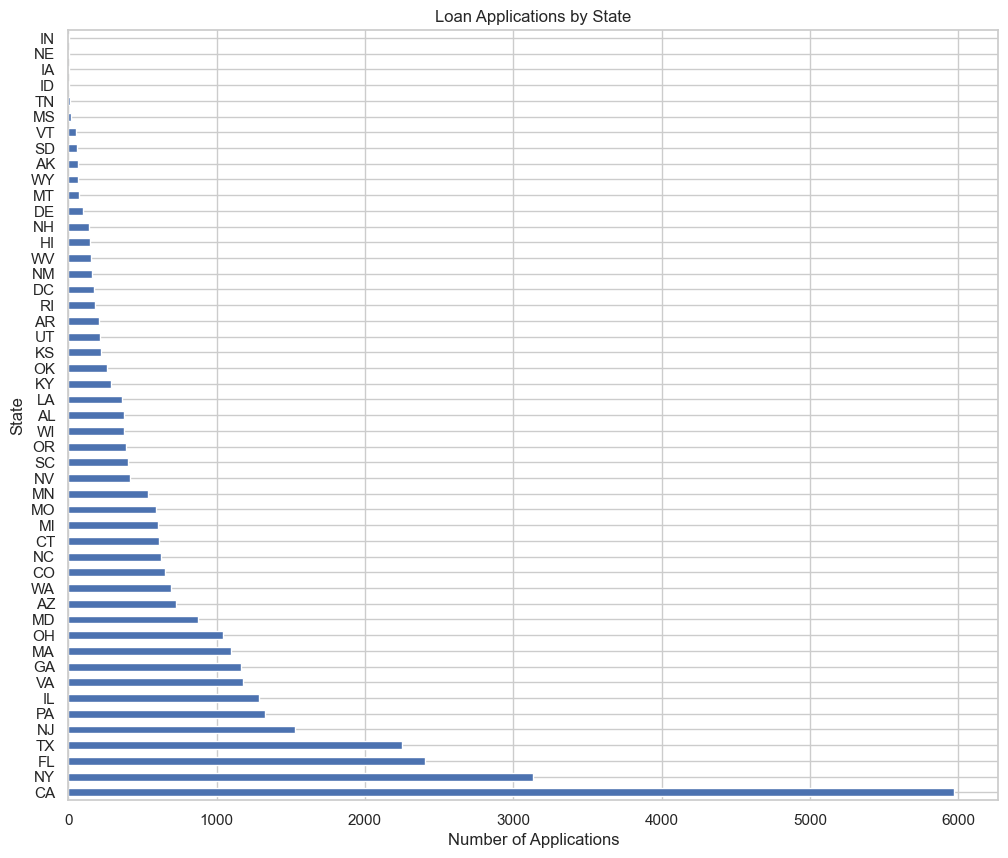

In [1069]:
df['addr_state'].value_counts().plot.barh(figsize=(12, 10))
plt.title("Loan Applications by State")
plt.xlabel("Number of Applications")
plt.ylabel("State")
plt.show()

<span style="color:green">OBSERVATION: </br> 
1. From above graph it is clear that most of the applicants are from CA state
</span>

## 4.3 Ordered Categorical Variable

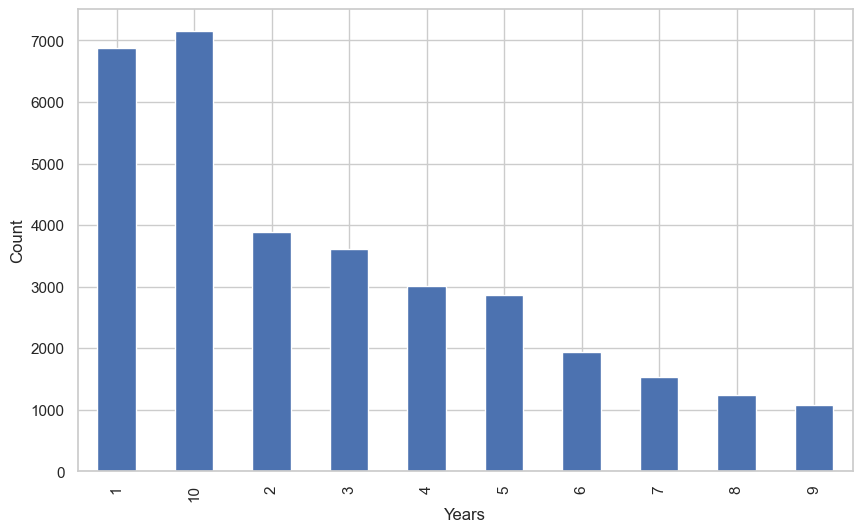

In [1072]:
df['emp_length'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.ylabel("Count")
plt.xlabel("Years")
plt.show()

<span style="color:green">OBSERVATION: </br> 
1. Most of the applicants are 1 year and 10 year experience people
</span>

In [1074]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_months,issue_year,issue_month
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,36,2011,12
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,60,2011,12
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,36,2011,12
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,36,2011,12
5,1075269,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,36,2011,12


# 5. BIVARIATE ANALYSIS

**Derive columns with bins for some quantative columns so that they will become categories**

In [1077]:
df['loan_amnt'].describe()

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [1078]:
loan_amnt_bins = [500, 5000, 9000, 13750, 20000, 29000]
loan_amnt_labels = ['500-5k', '5k-9k', '9k-13.75k', '13.75k-20k', '20k-29k']
df['loan_amnt_bins'] = pd.cut(x=df['loan_amnt'], bins=loan_amnt_bins, labels=loan_amnt_labels, right=True)

In [1079]:
df['int_rate'].describe()

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [1080]:
int_rate_bins = [5.42, 8.9, 11.71, 14.26, 17, 22.11]
int_rate_labels = ['very_low', 'low', 'medium', 'high', 'very_high']
df['int_rate_bins'] = pd.cut(x=df['int_rate'], bins=int_rate_bins, labels=int_rate_labels, right=True)

In [1081]:
df['annual_inc'].describe()

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [1082]:
annual_inc_bins = [4000, 40000, 55000, 75000, 100000, 140000]
annual_inc_labels = ['4k-40k', '40k-55k', '55k-75k', '75k-100k', '100k-140k']
df['annual_inc_bins'] = pd.cut(x=df['annual_inc'], bins=annual_inc_bins, labels=annual_inc_labels, right=True)

In [1083]:
df['dti'].describe()

count    33191.000000
mean        13.463454
std          6.651684
min          0.000000
25%          8.360000
50%         13.570000
75%         18.730000
max         29.990000
Name: dti, dtype: float64

In [1084]:
dti_bins = [0, 8.36, 13.57, 18.73, 24, 29.99]
dti_labels = ['very_low', 'low', 'medium', 'high', 'very_high']
df['dti_bins'] = pd.cut(x=df['dti'], bins=dti_bins, labels=dti_labels, right=True)

In [1085]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_months,issue_year,issue_month,loan_amnt_bins,int_rate_bins,annual_inc_bins,dti_bins
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,36,2011,12,500-5k,low,4k-40k,very_high
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,60,2011,12,500-5k,high,4k-40k,very_low
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,36,2011,12,500-5k,high,4k-40k,low
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,36,2011,12,9k-13.75k,medium,40k-55k,high
5,1075269,5000.0,5000.0,5000.0,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,36,2011,12,500-5k,very_low,4k-40k,low


## 5.1 Charged-Off Proportion by Annual Income Range

In [1087]:
# Annual income range vs loan status
ann_inc_range_vs_status=df.groupby(['annual_inc_bins', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total loans in each annual income bucket:
ann_inc_range_vs_status['total']= ann_inc_range_vs_status['Charged Off'] + ann_inc_range_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
ann_inc_range_vs_status['charged_off_proportion']= ann_inc_range_vs_status['Charged Off']/ann_inc_range_vs_status['total']
ann_inc_range_vs_status.sort_values('charged_off_proportion', ascending=False)

loan_status,annual_inc_bins,Charged Off,Fully Paid,total,charged_off_proportion
0,4k-40k,1570,7325,8895,0.176504
1,40k-55k,1181,6769,7950,0.148553
2,55k-75k,1114,7099,8213,0.135639
3,75k-100k,582,4673,5255,0.110752
4,100k-140k,267,2610,2877,0.092805


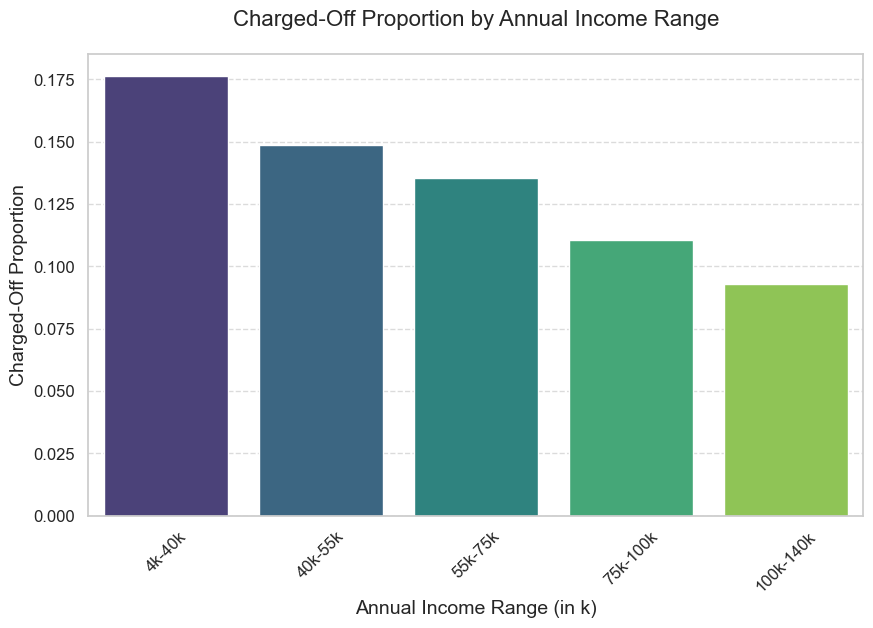

In [1088]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=ann_inc_range_vs_status, x='annual_inc_bins', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Annual Income Range', fontsize=16, pad=20)
ax.set_xlabel('Annual Income Range (in k)', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. High annual income users are less likely to be charged-off(above 75k+)
2. High chances of charged-off for the users who has less income(below 40k)
3. If annual income increases chances of charge-off decreases 
</span>

## 5.2 Charged-Off Proportion by Intrest Rate Range

In [1091]:
# Intrest Rate vs loan status
int_rate_range_vs_status=df.groupby(['int_rate_bins', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total loans in each interest rate bucket:
int_rate_range_vs_status['total']= int_rate_range_vs_status['Charged Off'] + int_rate_range_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
int_rate_range_vs_status['charged_off_proportion']= int_rate_range_vs_status['Charged Off']/int_rate_range_vs_status['total']
int_rate_range_vs_status.sort_values('charged_off_proportion', ascending=False)

loan_status,int_rate_bins,Charged Off,Fully Paid,total,charged_off_proportion
4,very_high,812,1797,2609,0.311230
3,high,1196,4461,5657,0.211419
2,medium,1244,6788,8032,0.154880
1,low,965,7436,8401,0.114867
0,very_low,483,7505,7988,0.060466


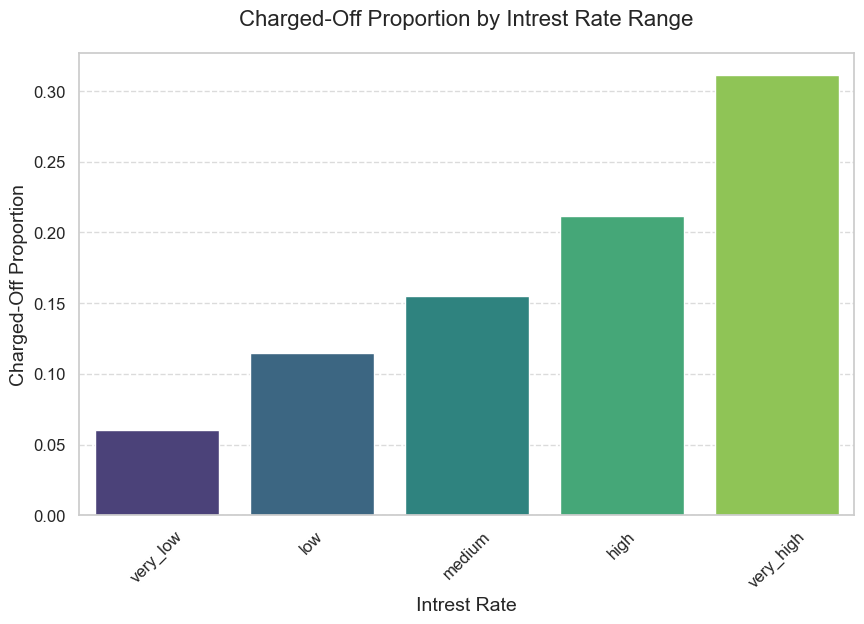

In [1092]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=int_rate_range_vs_status, x='int_rate_bins', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Intrest Rate Range', fontsize=16, pad=20)
ax.set_xlabel('Intrest Rate', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. High chances of charged_off for the users of very_high intrest rate(above 16%)
2. charged_off is directly proportional to intrest rate
3. Less chances of charged_off for intrest rate is less than 10%
</span>

## 5.3 Charged-Off Proportion by Home Owner Ship

In [1095]:
# home_ownership vs loan status
home_ownership_vs_status=df.groupby(['home_ownership', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total loans for each home_ownership:
home_ownership_vs_status['total']= home_ownership_vs_status['Charged Off'] + home_ownership_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
home_ownership_vs_status['charged_off_proportion']= home_ownership_vs_status['Charged Off']/home_ownership_vs_status['total']

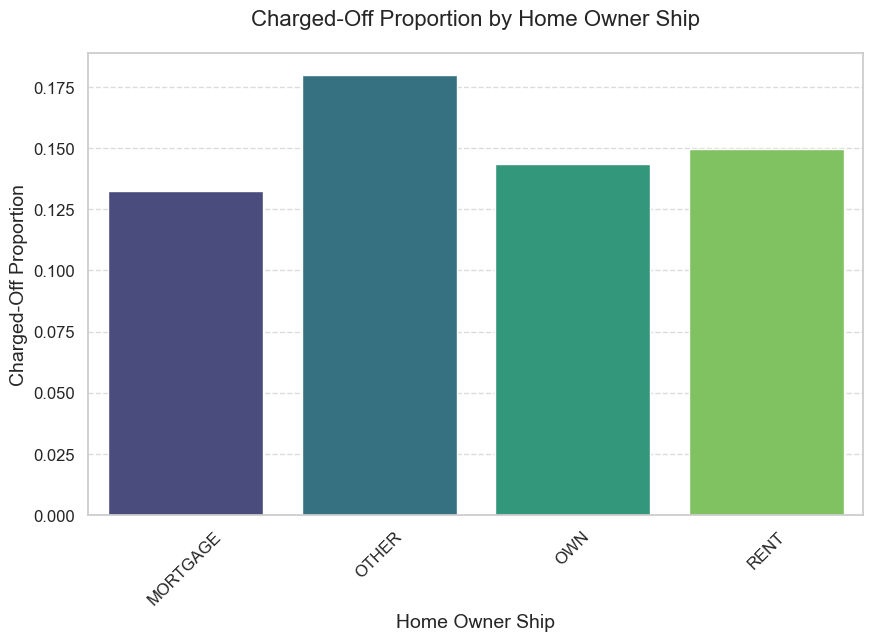

In [1096]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=home_ownership_vs_status, x='home_ownership', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Home Owner Ship', fontsize=16, pad=20)
ax.set_xlabel('Home Owner Ship', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. High chances of charged_off for the users who are not owning house or mortage
2. Rent and other's have high chances of charged_off
</span>

## 5.4 Charged-Off Proportion by Purpose of loan

In [1099]:
# purpose vs loan status
purpose_vs_status=df.groupby(['purpose', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total loans for each purpose:
purpose_vs_status['total']= purpose_vs_status['Charged Off'] + purpose_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
purpose_vs_status['charged_off_proportion']= purpose_vs_status['Charged Off']/purpose_vs_status['total']

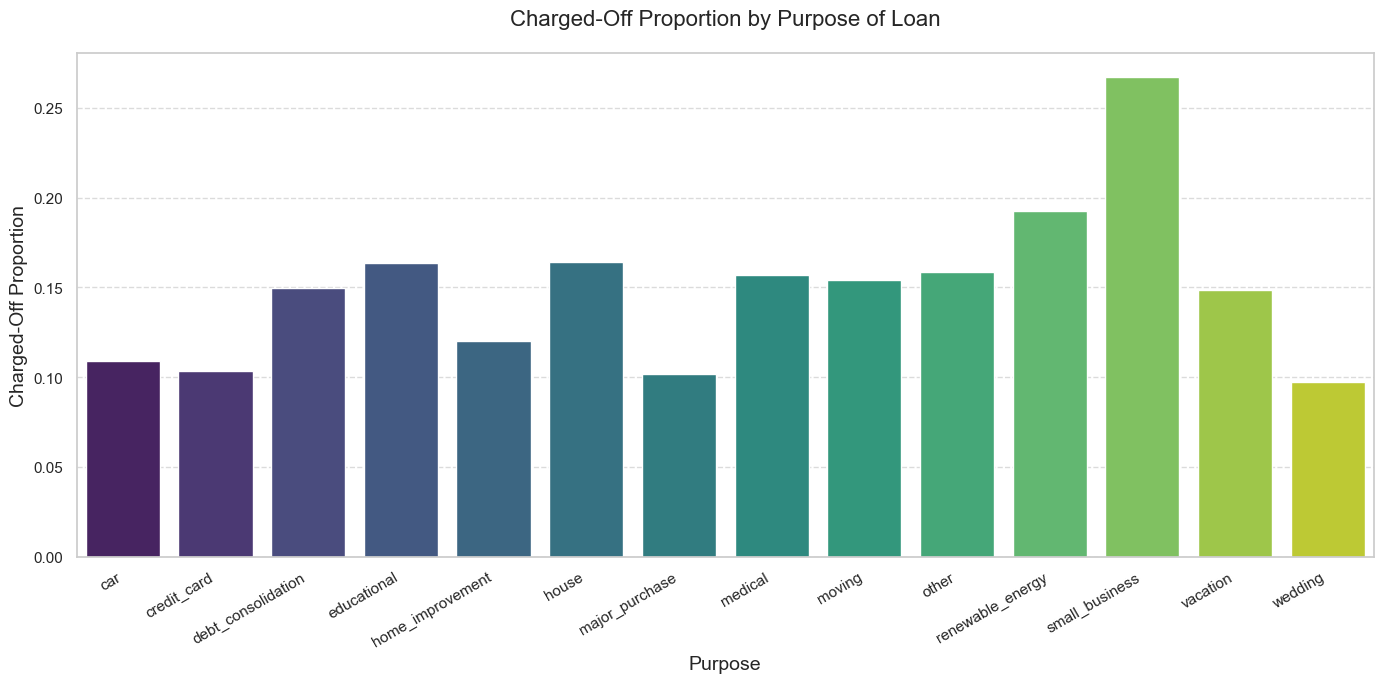

In [1100]:
plt.figure(figsize=(14, 7))  # Increase width
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=purpose_vs_status, x='purpose', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Purpose of Loan', fontsize=16, pad=20)
ax.set_xlabel('Purpose', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)

plt.xticks(rotation=30, ha='right', fontsize=12)

plt.xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


<span style="color:green">OBSERVATION: </br> 
1. High chances of charged_off for the users who are applying loan for small business
2. Less chances of charged_off for car,credit_card, wedding, major_purchase, home_improvement purpose loans
</span>

## 5.4 Charged-Off Proportion by Debt To Income Ratio(dti)

In [1103]:
# dti vs loan status
dti_vs_status=df.groupby(['dti_bins', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total, for each dti:
dti_vs_status['total']= dti_vs_status['Charged Off'] + dti_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
dti_vs_status['charged_off_proportion']= dti_vs_status['Charged Off']/dti_vs_status['total']

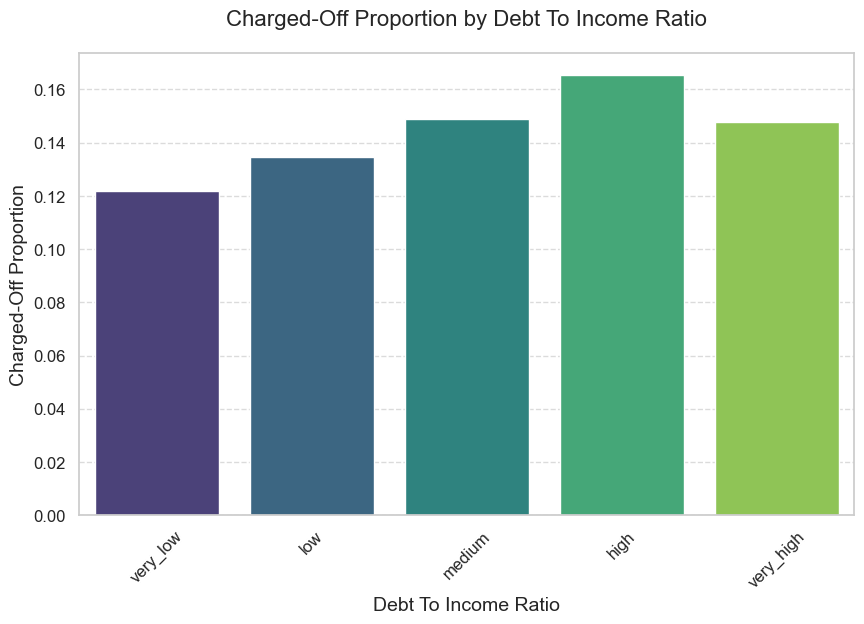

In [1104]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=dti_vs_status, x='dti_bins', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Debt To Income Ratio', fontsize=16, pad=20)
ax.set_xlabel('Debt To Income Ratio', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. Less chances of defaults for lower dti values
2. High chances of defaults for higher dti values
</span>

## 5.4 Charged-Off Proportion by Public Record Bank Ruptcies

In [1107]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

In [1108]:
# we can use pub_rec_bankruptcies categorical variable as it has only 3 distinct values
pub_rec_bankruptcies_vs_status=df.groupby(['pub_rec_bankruptcies', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total, for each pub_rec_bankruptcies:
pub_rec_bankruptcies_vs_status['total']= pub_rec_bankruptcies_vs_status['Charged Off'] + pub_rec_bankruptcies_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
pub_rec_bankruptcies_vs_status['charged_off_proportion']= pub_rec_bankruptcies_vs_status['Charged Off']/pub_rec_bankruptcies_vs_status['total']

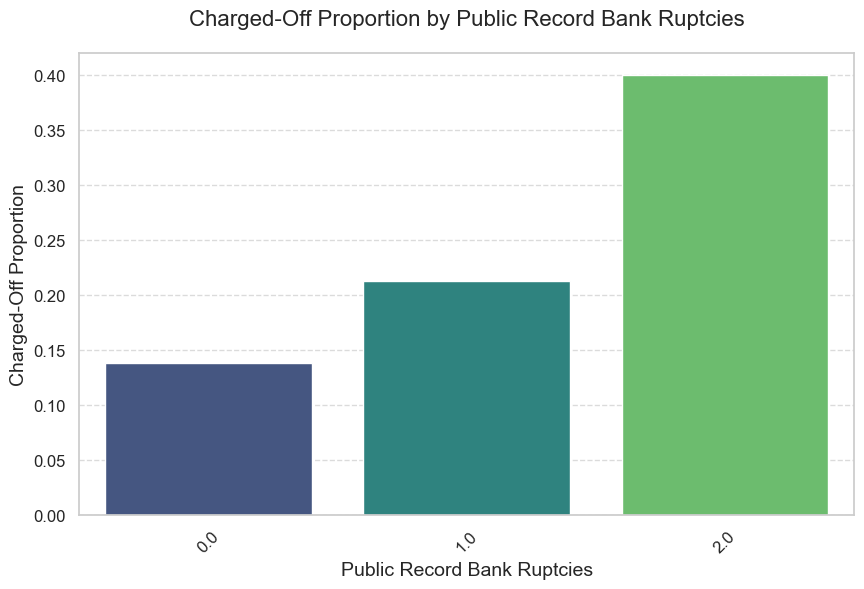

In [1109]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=pub_rec_bankruptcies_vs_status, x='pub_rec_bankruptcies', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Public Record Bank Ruptcies', fontsize=16, pad=20)
ax.set_xlabel('Public Record Bank Ruptcies', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. Public Record Bank Ruptcies is directly proportional to defaults(charged-off proportion)
</span>

## 5.4 Charged-Off Proportion by Grade

In [1112]:
df['grade'].value_counts()

grade
B    10082
A     9026
C     6879
D     4270
E     2075
F      700
G      159
Name: count, dtype: int64

In [1113]:
grade_vs_status=df.groupby(['grade', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total, for each grade:
grade_vs_status['total']= grade_vs_status['Charged Off'] + grade_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
grade_vs_status['charged_off_proportion']= grade_vs_status['Charged Off']/grade_vs_status['total']

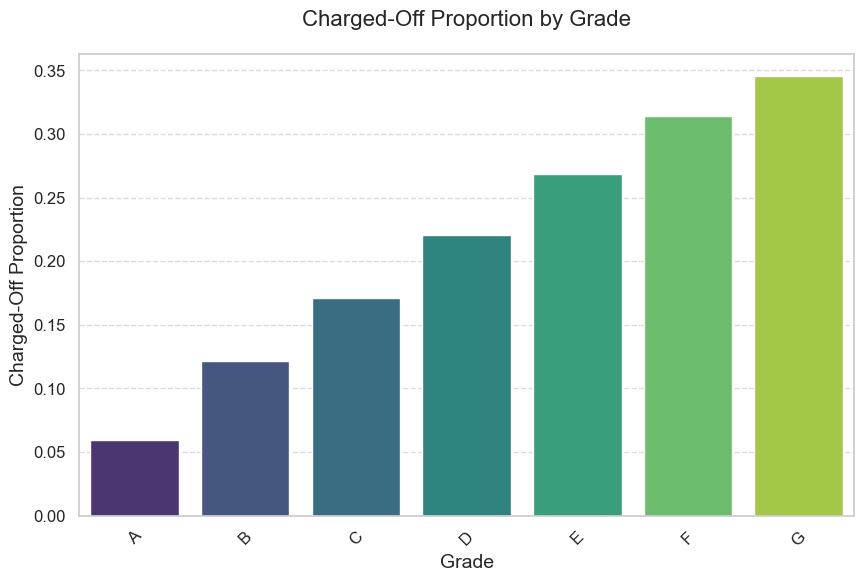

In [1114]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=grade_vs_status, x='grade', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Grade', fontsize=16, pad=20)
ax.set_xlabel('Grade', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. Grade G is having highest defaults
2. Grade A is having lowest defaults
</span>

## 5.4 Charged-Off Proportion by ADDRESS STATE

In [1117]:
addr_state_vs_status=df.groupby(['addr_state', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total, for each addr_state:
addr_state_vs_status['total']= addr_state_vs_status['Charged Off'] + addr_state_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
addr_state_vs_status['charged_off_proportion']= addr_state_vs_status['Charged Off']/addr_state_vs_status['total']

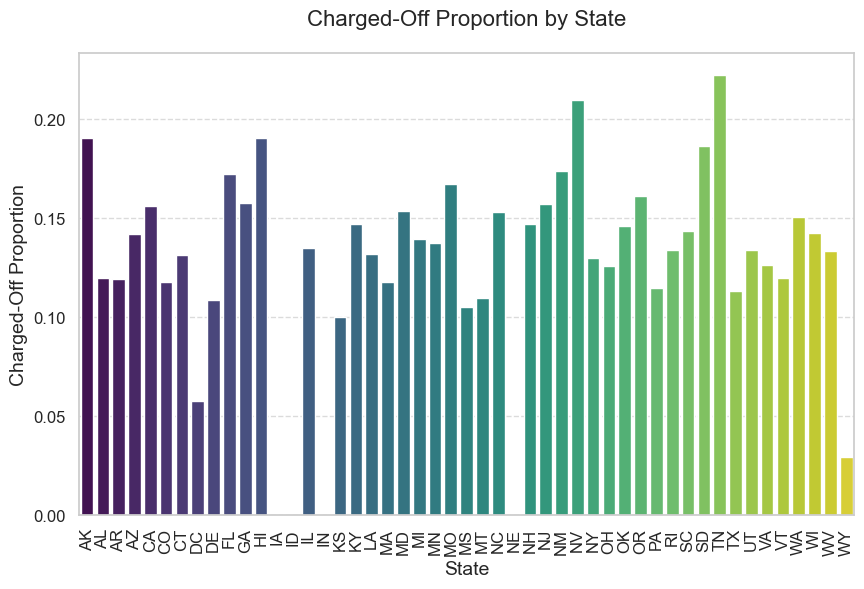

In [1118]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=addr_state_vs_status, x='addr_state', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by State', fontsize=16, pad=20)
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. TN has the highest charged_off_proportion
2. There are also some states which has zero charged_off_proportion
</span>

## 5.5 Charged-Off Proportion by ISSUE MONTH

In [1121]:
issue_month_vs_status=df.groupby(['issue_month', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total, for each issue_month:
issue_month_vs_status['total']= issue_month_vs_status['Charged Off'] + issue_month_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
issue_month_vs_status['charged_off_proportion']= issue_month_vs_status['Charged Off']/issue_month_vs_status['total']

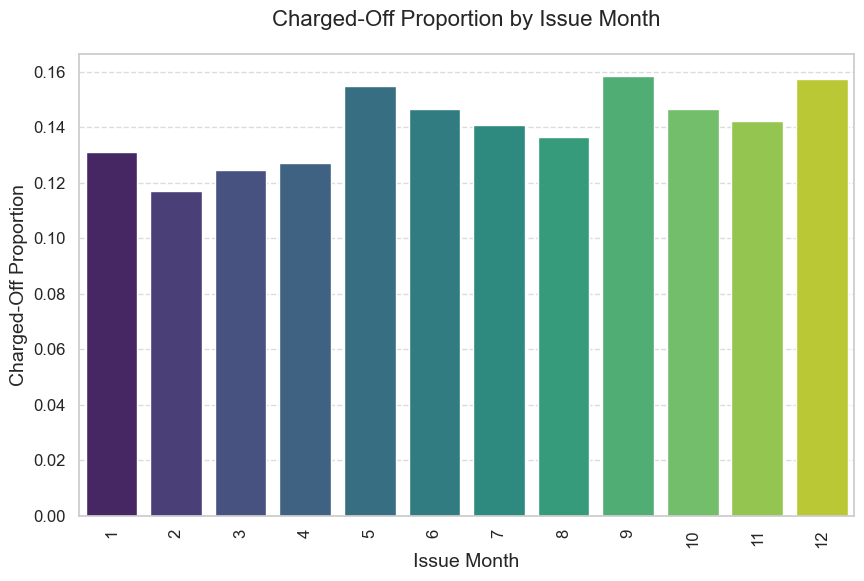

In [1122]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=issue_month_vs_status, x='issue_month', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Issue Month', fontsize=16, pad=20)
ax.set_xlabel('Issue Month', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. September and December month has highest defaults where as february has lowest defaults
</span>

## 5.5 Charged-Off Proportion by ISSUE YEAR

In [1125]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'term_months', 'issue_year', 'issue_month', 'loan_amnt_bins',
       'int_rate_bins', 'annual_inc_bins', 'dti_bins'],
      dtype='object')

In [1126]:
issue_year_vs_status=df.groupby(['issue_year', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
# Calculating total, for each issue_year:
issue_year_vs_status['total']= issue_year_vs_status['Charged Off'] + issue_year_vs_status['Fully Paid']
# Calculating Chargedoff_Proportion:
issue_year_vs_status['charged_off_proportion']= issue_year_vs_status['Charged Off']/issue_year_vs_status['total']

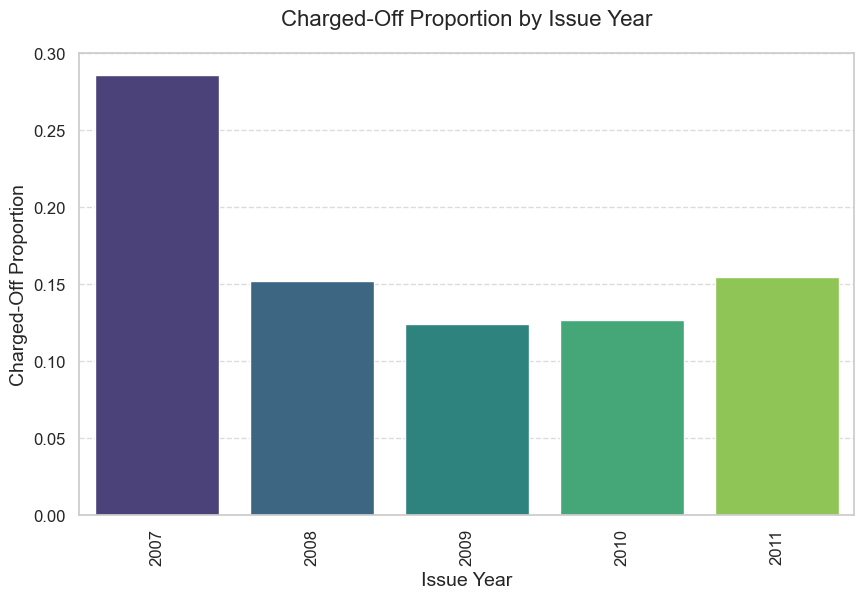

In [1127]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=issue_year_vs_status, x='issue_year', y='charged_off_proportion', palette="viridis")

ax.set_title('Charged-Off Proportion by Issue Year', fontsize=16, pad=20)
ax.set_xlabel('Issue Year', fontsize=14)
ax.set_ylabel('Charged-Off Proportion', fontsize=14)


plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="color:green">OBSERVATION: </br> 
1. 2007 has highest defaults where as for remaining years they are less
2. But from 2011 are increased again
</span>

# 6. Correlation Matrix

In [1287]:
# dropping columns which are not required in correlation
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
df.drop(columns=drop_columns, inplace=True)

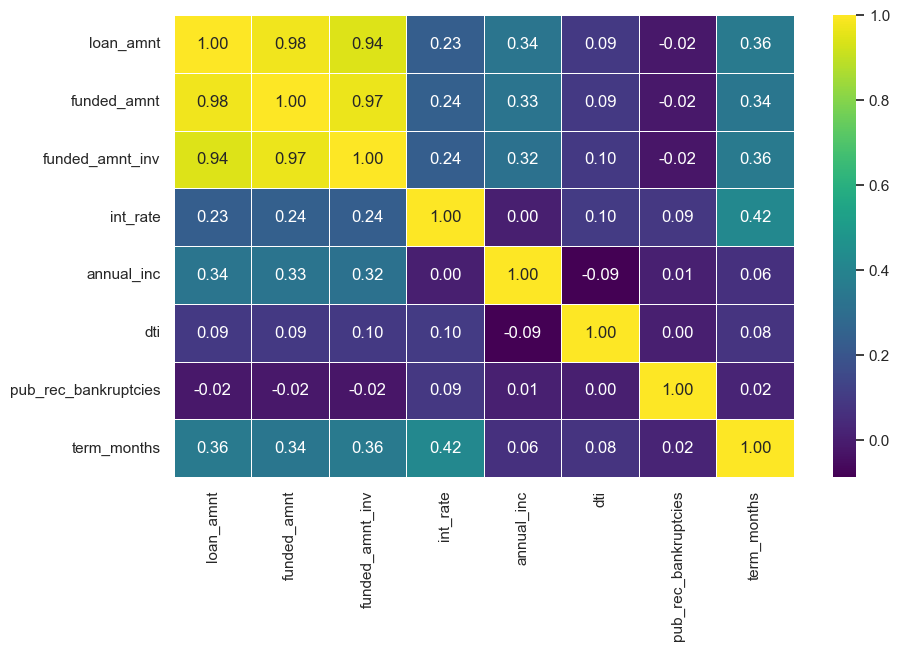

In [1291]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 6)) 
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.show()

<span style="color:green">OBSERVATION: </br> 
1. Loan amount is negatively correlated with Number of public record bankruptcies
2. Intrest rate is strongly correlated with Term
3. Annual income is negatively correlated with dti
</span>